In [2]:
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.finance as finplt
import matplotlib.dates as pltdt
%matplotlib inline

In [3]:
#Rebuild the MACD Strategy
data = pd.read_csv('daily_price.csv',parse_dates = ['DATADATE'])
data.columns = ['ticker','datadate','currency','adj_factor','prc_open','prc_close','prc_high','prc_low','shrs']

In [4]:
#Get the data for msft
msft = data[data['ticker']=='msft'].reset_index(drop=True)

In [5]:
#Store the adjusted close data as close
msft['close'] = msft['prc_close']/msft['adj_factor']

#Calculate as standard 9-12-26 MACD.
msft['close_12ema'] = pd.ewma(msft['close'],span=12) 
msft['close_26ema'] = pd.ewma(msft['close'],span=26) 
msft['close_macd'] = msft['close_12ema']-msft['close_26ema']
msft['macd_9ema'] = pd.ewma(msft['close_macd'],9)

In [6]:
msft.head()

,ticker,datadate,currency,adj_factor,prc_open,prc_close,prc_high,prc_low,shrs,close,close_12ema,close_26ema,close_macd,macd_9ema
0,msft,1986-03-13,USD,288,NaN,28.00,29.25,25.5,3583000,0.097222,0.097222,0.097222,0.000000,0.000000
1,msft,1986-03-14,USD,288,NaN,29.00,29.50,28.0,1070000,0.100694,0.099103,0.099025,0.000078,0.000041
2,msft,1986-03-17,USD,288,NaN,29.50,29.75,29.0,462400,0.102431,0.100402,0.100249,0.000153,0.000082
3,msft,1986-03-18,USD,288,NaN,28.75,29.75,28.5,230800,0.099826,0.100220,0.100131,0.000090,0.000084
4,msft,1986-03-19,USD,288,NaN,28.25,29.00,28.0,166300,0.098090,0.099641,0.099657,-0.000016,0.000060


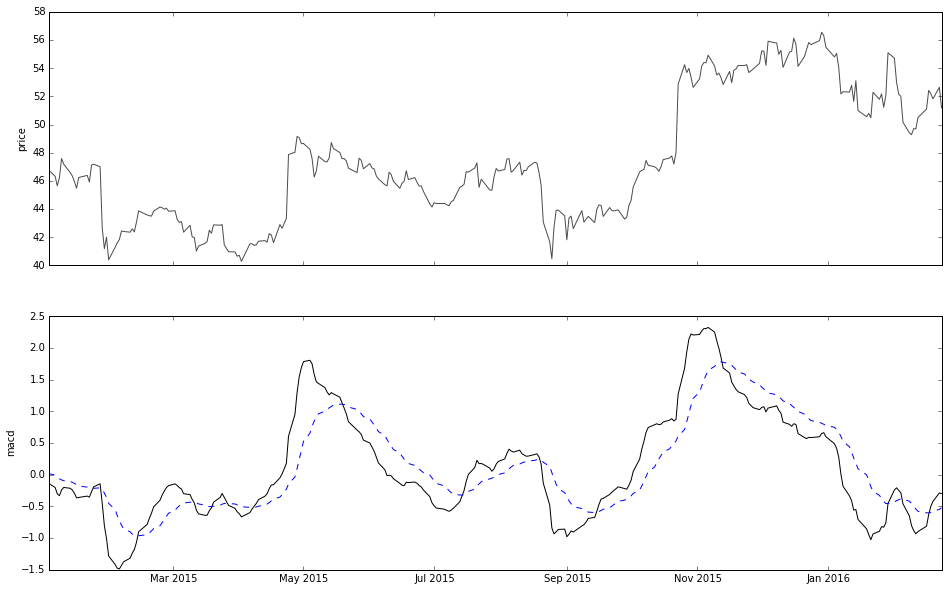

In [10]:
#Plot the Data
plot_data = msft[msft['datadate'] >= '2015-01-01']

macd_fig, ax = plt.subplots(2, sharex=True,figsize=(16,10))
ax[0].plot(plot_data['datadate'],plot_data['close'],'k-',alpha=.7)
ax[0].set_ylabel('price', color='k')

ax[1].plot(plot_data['datadate'],plot_data['close_macd'],'k-')
ax[1].plot(plot_data['datadate'],plot_data['macd_9ema'],'b--')
ax[1].set_ylabel('macd', color='k')
plt.show()



In [8]:
#Calculate the cross overs
msft['macd_vs_macd9d'] = np.where(msft['close_macd']>=msft['macd_9ema'],1,0)
msft['trade_direction'] = msft['macd_vs_macd9d'].diff(1)

In [14]:
#Get all the buys and sells
msft[((msft['trade_direction']==1)|(msft['trade_direction']== -1))&(msft['datadate']>'01-05-2015')][['ticker','datadate','close','close_macd','macd_9ema','trade_direction']]

,ticker,datadate,close,close_macd,macd_9ema,trade_direction
7277,msft,2015-01-23,47.18,-0.191813,-0.214617,1
7279,msft,2015-01-27,42.66,-0.452055,-0.232012,-1
7292,msft,2015-02-13,43.87,-0.899936,-0.962729,1
7309,msft,2015-03-11,41.98,-0.445537,-0.431226,-1
7316,msft,2015-03-20,42.88,-0.433626,-0.497768,1
7321,msft,2015-03-27,40.97,-0.484474,-0.454374,-1
7328,msft,2015-04-08,41.42,-0.495936,-0.515337,1
7358,msft,2015-05-20,47.58,1.048372,1.106115,-1
7396,msft,2015-07-15,45.76,-0.249100,-0.314277,1
7422,msft,2015-08-20,45.66,0.165203,0.233287,-1
